# Linear Regression StatsModel

## This notebook covers Linear Regression using Statsmodels

**==============================================================================================================**

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, Binarizer, OrdinalEncoder

from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

from sklearn.model_selection import train_test_split

set_config(transform_output="pandas")

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Quick Data Glance

In [2]:
df = pd.read_csv("airfoil.csv")

In [3]:
df.head()

,frequency,angleofattack,chordlength,freestreamvelocity,suctionsidedisplacement,soundleveldecibels
0,800.00,0.00,0.30,71.30,0.00,126.20
1,1000.00,0.00,0.30,71.30,0.00,125.20
2,1250.00,0.00,0.30,71.30,0.00,125.95
3,1600.00,0.00,0.30,71.30,0.00,127.59
4,2000.00,0.00,0.30,71.30,0.00,127.46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   frequency                1499 non-null   float64
 1   angleofattack            1499 non-null   float64
 2   chordlength              1499 non-null   float64
 3   freestreamvelocity       1499 non-null   float64
 4   suctionsidedisplacement  1499 non-null   float64
 5   soundleveldecibels       1499 non-null   float64
dtypes: float64(6)
memory usage: 70.4 KB


In [5]:
df.dtypes.value_counts()

float64    6
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,frequency,angleofattack,chordlength,freestreamvelocity,suctionsidedisplacement,soundleveldecibels
count,1499.00,1499.00,1499.00,1499.00,1499.00,1499.00
mean,2889.36,6.80,0.14,50.88,0.01,124.83
std,3155.76,5.92,0.09,15.58,0.01,6.91
min,200.00,0.00,0.03,31.70,0.00,103.38
25%,800.00,2.00,0.05,39.60,0.00,120.19
50%,1600.00,5.40,0.10,39.60,0.00,125.72
75%,4000.00,9.90,0.23,71.30,0.02,130.01
max,20000.00,22.20,0.30,71.30,0.06,140.99


In [7]:
df.shape

(1499, 6)

In [8]:
df.columns

Index(['frequency', 'angleofattack', 'chordlength', 'freestreamvelocity', 'suctionsidedisplacement', 'soundleveldecibels'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

frequency                  0
angleofattack              0
chordlength                0
freestreamvelocity         0
suctionsidedisplacement    0
soundleveldecibels         0
dtype: int64

**=================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [11]:
df.shape

(1499, 6)

In [12]:
df.head()

,frequency,angleofattack,chordlength,freestreamvelocity,suctionsidedisplacement,soundleveldecibels
0,800.00,0.00,0.30,71.30,0.00,126.20
1,1000.00,0.00,0.30,71.30,0.00,125.20
2,1250.00,0.00,0.30,71.30,0.00,125.95
3,1600.00,0.00,0.30,71.30,0.00,127.59
4,2000.00,0.00,0.30,71.30,0.00,127.46


In [13]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [14]:
X.values, y.values

(array([[ 800.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        [1000.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        [1250.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        ...,
        [4000.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ],
        [5000.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ],
        [6300.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ]]),
 array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204]))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1049, 5), (450, 5), (1049,), (450,))

**=================================================================================================================**

##  Linear Regression 

Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


**=================================================================================================================**

## Simple Linear Regression / Multiple Linear Regression (StatsModel)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [17]:
X.values, y.values

(array([[ 800.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        [1000.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        [1250.        ,    0.        ,    0.3048    ,   71.3       ,
            0.00266337],
        ...,
        [4000.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ],
        [5000.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ],
        [6300.        ,   15.6       ,    0.1016    ,   39.6       ,
            0.0528487 ]]),
 array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204]))

In [18]:
X = sm.add_constant(X)

In [19]:
mlrmodel = sm.OLS(y,X).fit()

In [20]:
mlrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     soundleveldecibels   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     318.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          2.30e-232
Time:                        07:46:04   Log-Likelihood:                -4478.8
No. Observations:                1499   AIC:                             8970.
Df Residuals:                    1493   BIC:                             9001.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     132.8272      0.545    243.707      0.000     131.758     133.896
frequency                  -0.0013   4.21e-05    -30.399      0.000      -0.001      -0.001
angleofattack              -0.4224      0.039    -10.853      0.000      -0.499      -0.346
chordlength               -35.8282      1.636    -21.900      0.000     -39.037     -32.619
freestreamvelocity          0.1001      0.008     12.303      0.000       0.084       0.116
suctionsidedisplacement  -147.0021     15.024     -9.785      0.000    -176.472    -117.533
==============================================================================
Omnibus:                       12.935   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.210
Skew:                          -0.021   Prob(JB):                     6.74e-05
Kurtosis:                       3.553   Cond. No.                     5.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion:** Like the t-test, the p-value is more than the alpha (α) level = 0.05, so we fail to reject the null hypothesis. The coefficient -11.53 means that VendorID2 get 11.53 scores less.

### 2nd method

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

`linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()`


Write out OLS formula as a string:

`
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"
`

**=================================================================================================================**

## Model evaluation and interpretation

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

### Explain the Statistics

Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.

Method : Least Squares : Fit data to the model by minimizing the residual samples

R-squared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated. 

Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.

F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means. 

Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.

Log-Likelihood : The conditional probability that the observed data fits the model

AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.

Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.

BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.

Df Model : Number of parameters in the model

Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.

Independent Coefficient : Represents the change of the independent variable per unit.

Standard Error : Accuracy of the coefficients

P>|t| : The P Value. A P Value less than .05 is considered statistically significant.

[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.

Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.

Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated. 

Prob(Omnibus) : Probability of Omnibus

Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution. 

Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.

Prob(JB) : The probability of Jarque-Bera

Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.

Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.

### Residual Plots

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not label the points, but you can use them to identify problems and then use plot_partregress to get more information.
```
sm.graphics.plot_partregress(
                             endog='prestige', # response
                             exog_i='income', # variable of interest
                             exog_others=['education'], # other predictors
                             data=df,  # dataframe
                             obs_labels=True # show labels
                             );
```

eval_env: 1


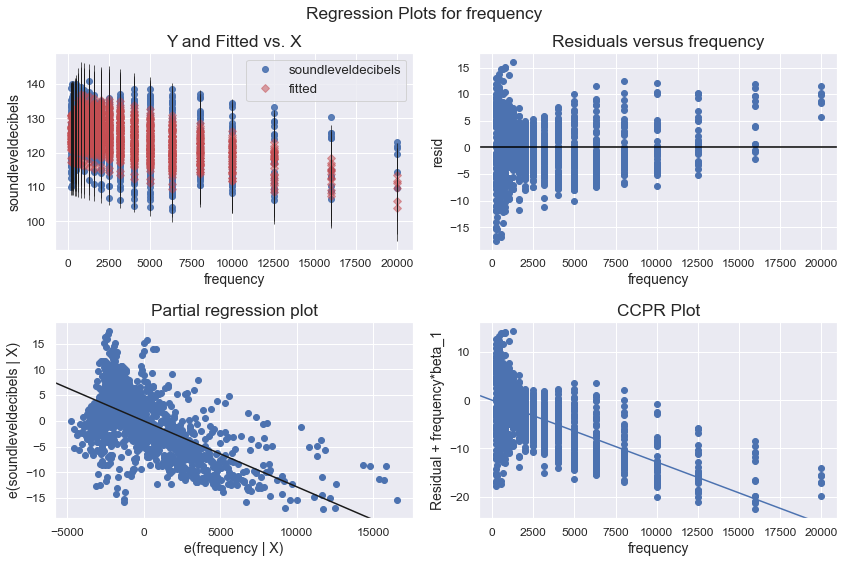

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(mlrmodel, 'frequency', fig=fig)

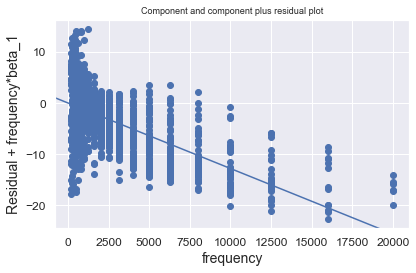

In [22]:
sm.graphics.plot_ccpr(mlrmodel, "frequency")
plt.tight_layout(pad=1.0)
plt.show()

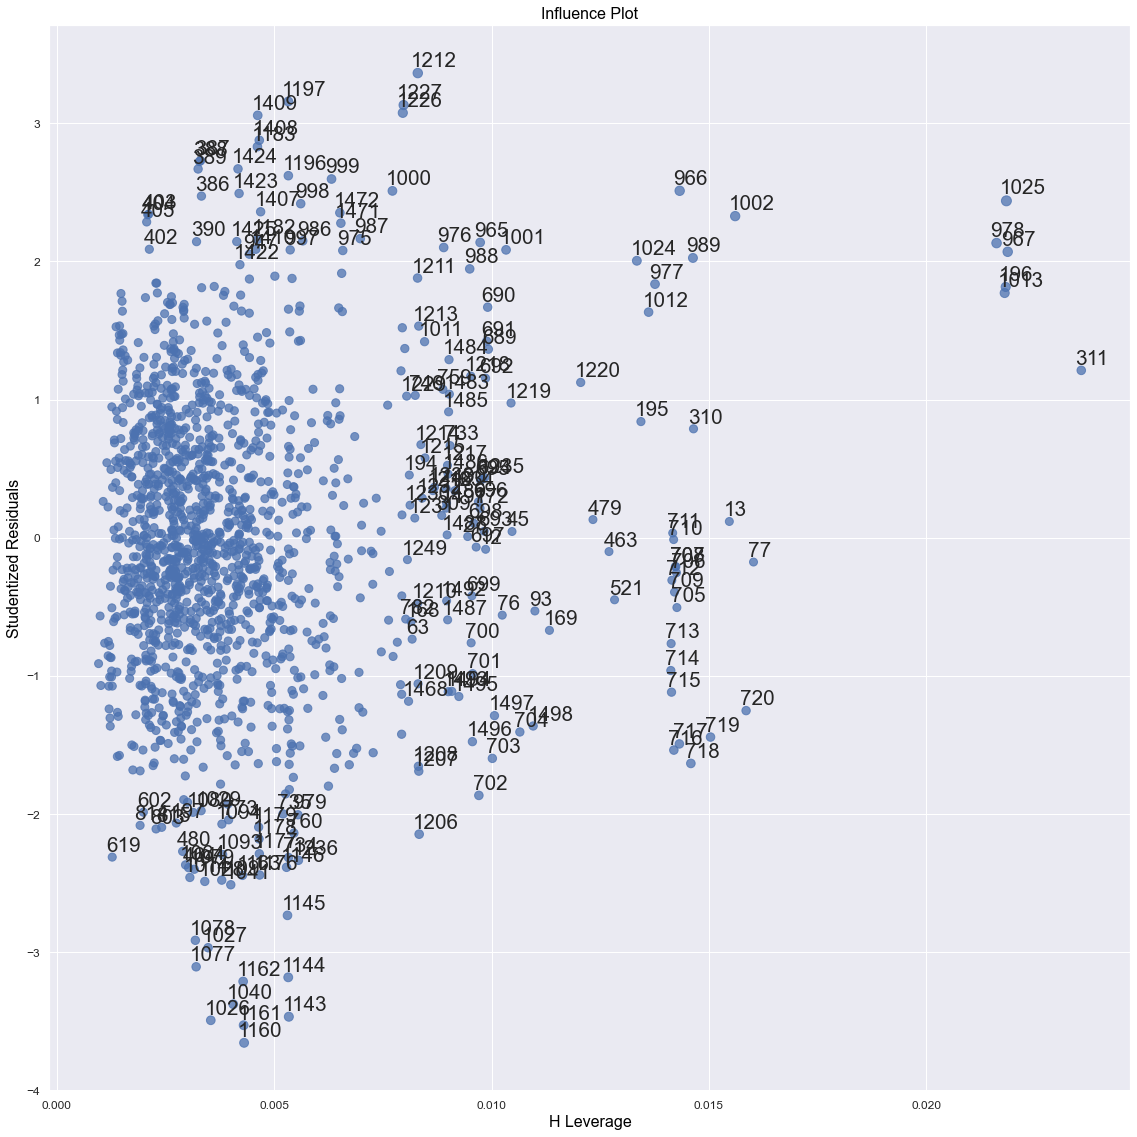

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
fig = sm.graphics.influence_plot(mlrmodel, criterion="cooks", size=10, ax=ax)
fig.tight_layout(pad=1.0)
plt.show()

eval_env: 1


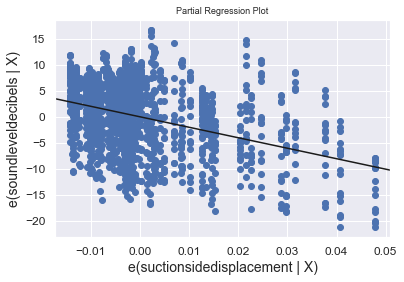

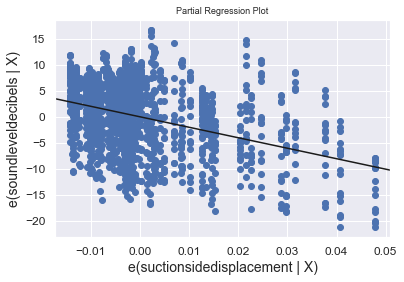

In [24]:
#fig, ax = plt.subplots(figsize=(16,16))

sm.graphics.plot_partregress(
                             endog='soundleveldecibels', # response
                             exog_i='suctionsidedisplacement', # variable of interest
                             exog_others=['chordlength'], # other predictors
                             data=df,  # dataframe
                             obs_labels=False # show labels
                             )



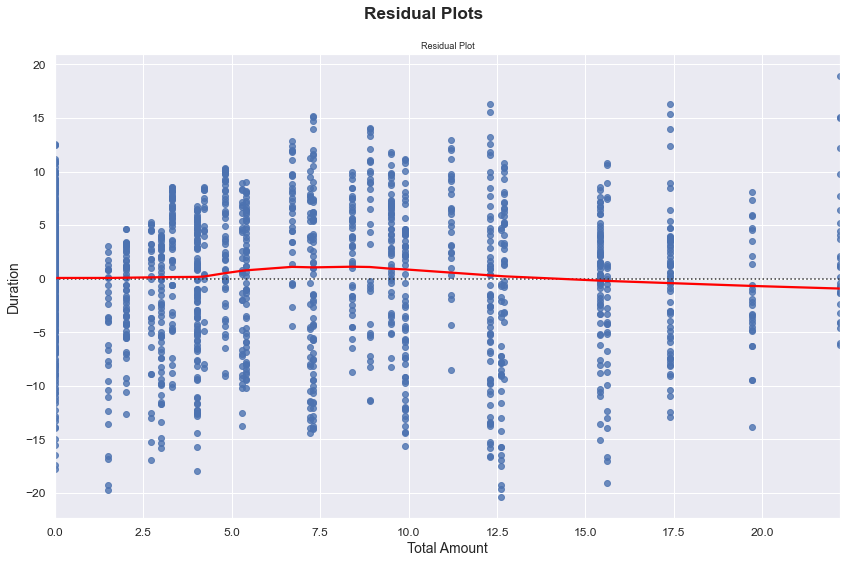

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Residual Plots', weight='bold')

sns.residplot(data=df, x="angleofattack", y="soundleveldecibels", x_partial=None, y_partial=None, 
                  lowess=True, order=1, robust=False, dropna=True, label=None, 
                  color=None, scatter_kws=None, line_kws={'color': 'red'}, ax=None)

ax.set_title('Residual Plot')
ax.set_xlabel('Total Amount')
ax.set_ylabel('Duration')

fig.tight_layout()
plt.show()

**=================================================================================================================**

# Check model assumptions (Statsmodel)

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected above with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

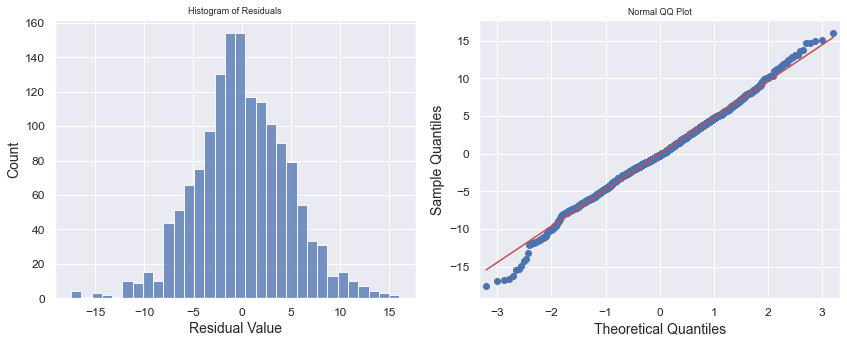

In [26]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = mlrmodel.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (12,5))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

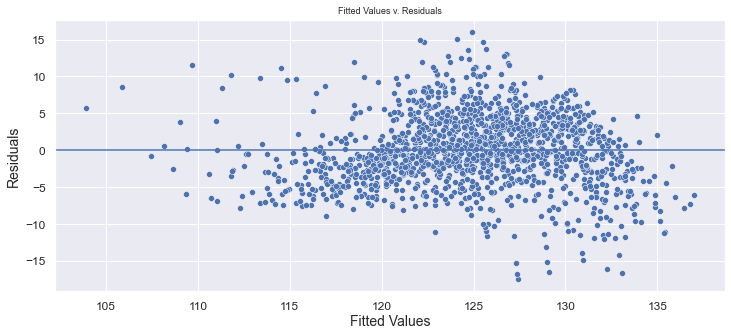

In [27]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

plt.figure(figsize=(12,5))

fig = sns.scatterplot(x = mlrmodel.fittedvalues, y = mlrmodel.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [28]:
df.columns

Index(['frequency', 'angleofattack', 'chordlength', 'freestreamvelocity', 'suctionsidedisplacement', 'soundleveldecibels'], dtype='object')

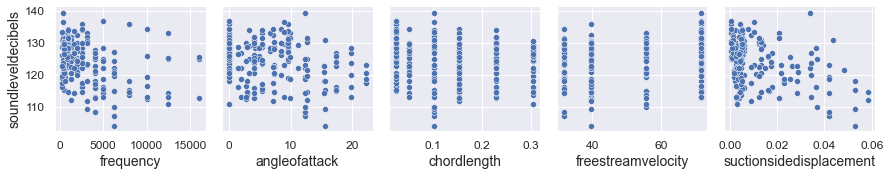

In [29]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(200), x_vars=['frequency', 'angleofattack', 'chordlength', 'freestreamvelocity', 'suctionsidedisplacement'],
            y_vars=['soundleveldecibels'])

plt.show()

In [30]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Create a subset of the data with the continous independent variables. 
X = df[['frequency', 'angleofattack', 'chordlength', 'freestreamvelocity', 'suctionsidedisplacement']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
frequency,1.94
angleofattack,6.56
chordlength,3.25
freestreamvelocity,7.14
suctionsidedisplacement,4.30


**=================================================================================================================**

#### Python code done by Dennis Lam